<a href="https://colab.research.google.com/github/kylianmbappe9/PhyicsMachineLearning/blob/main/Damped_And_Forced_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Time (s)  Angle (radians)  Angle (degrees)  Angular Velocity (rad/s)
0   0.00000         0.523599        30.000000                  0.000000
1   0.01001         0.523353        29.985921                 -0.049092
2   0.02002         0.522616        29.943696                 -0.098142
3   0.03003         0.521389        29.873374                 -0.147110
4   0.04004         0.519672        29.775036                 -0.195955
Symbolic Equations:
ω(t)
-9.81⋅sin(θ(t))


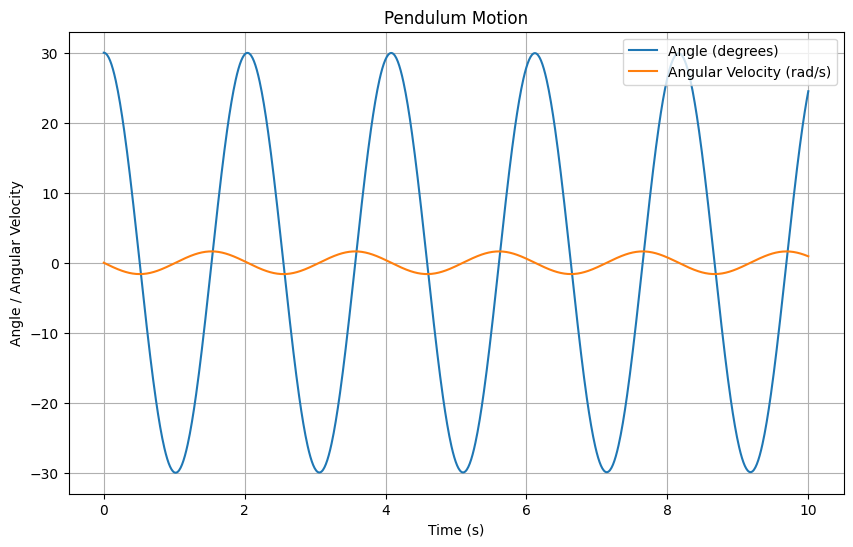

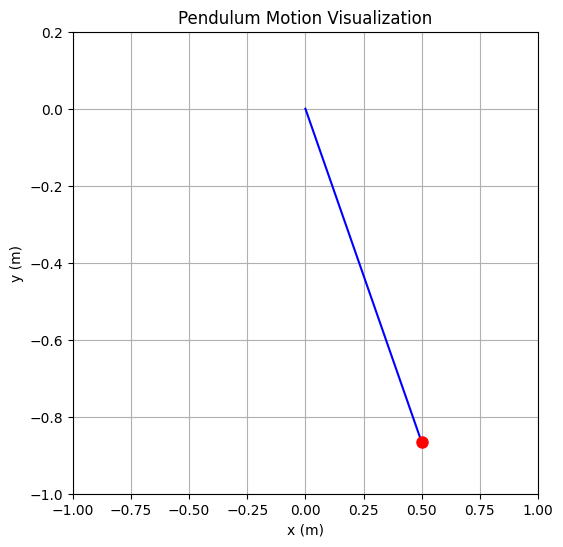

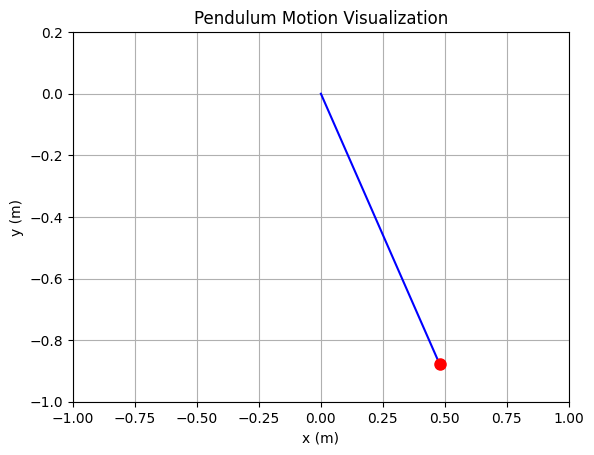

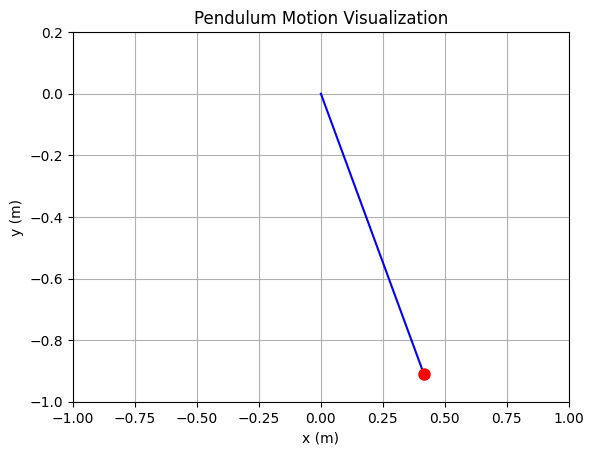

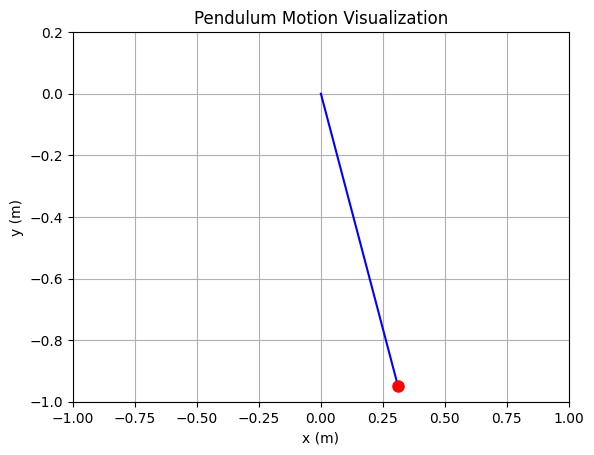

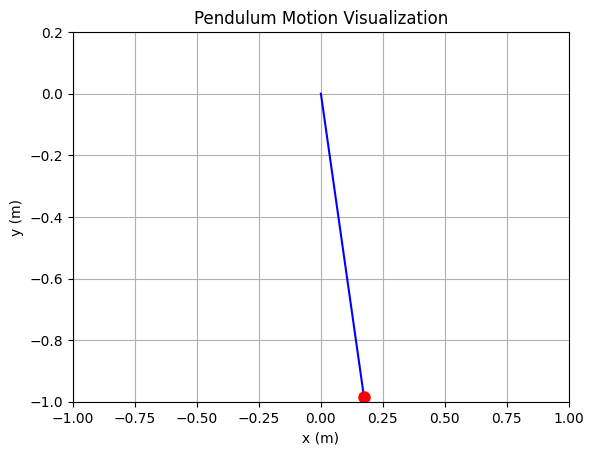

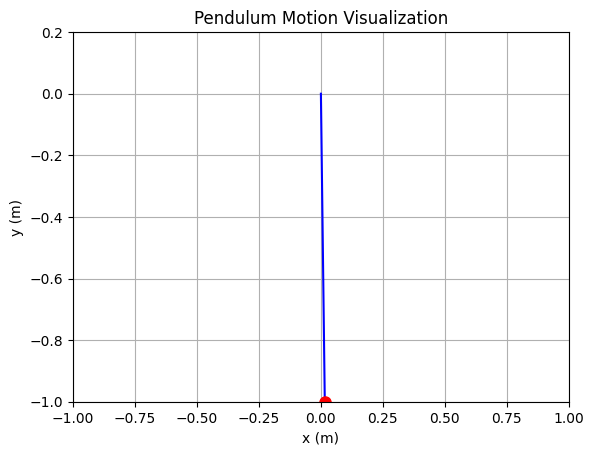

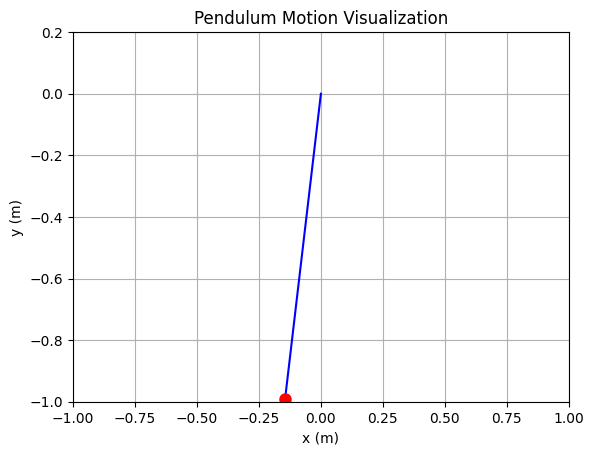

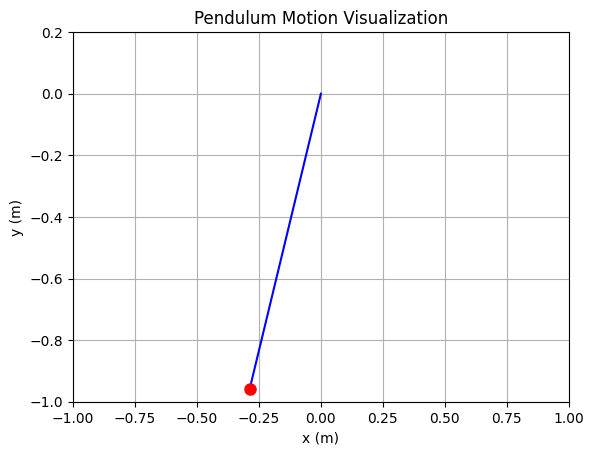

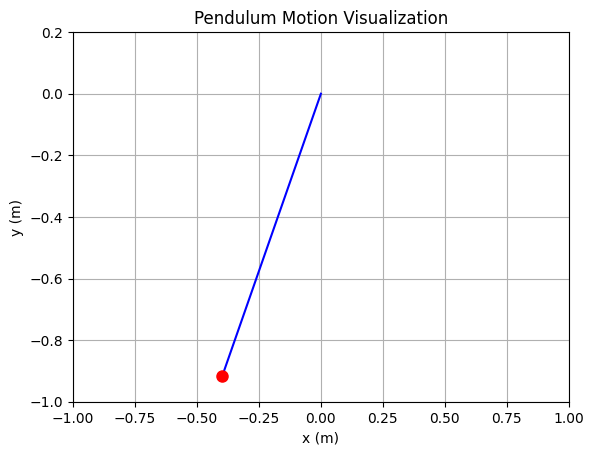

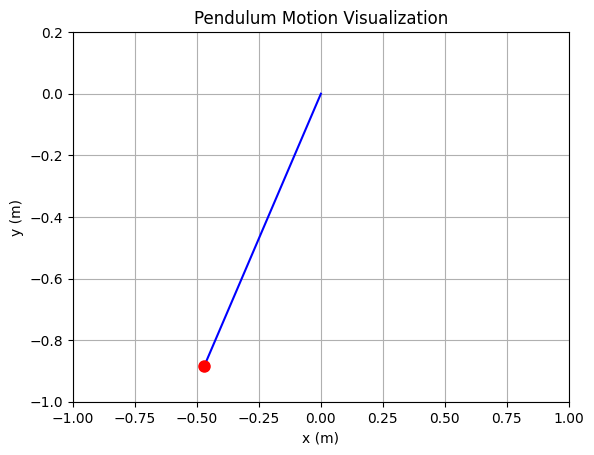

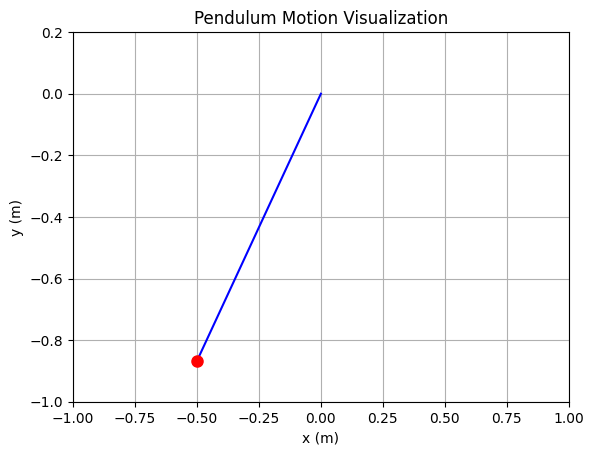

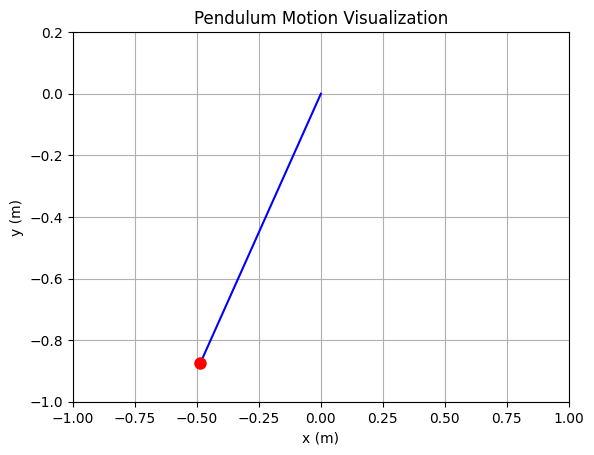

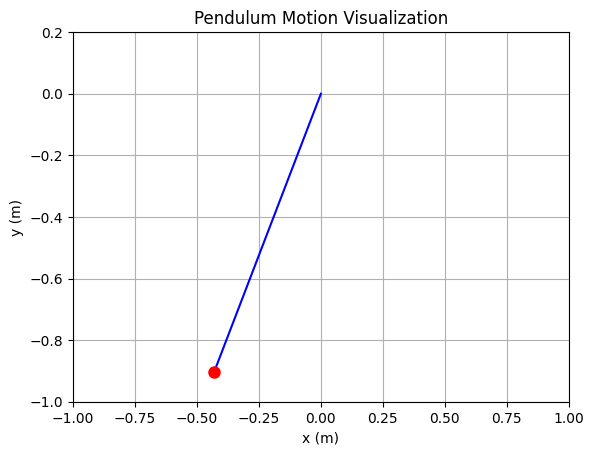

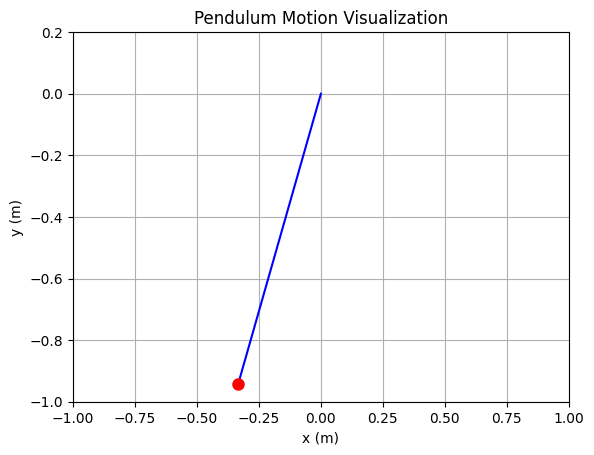

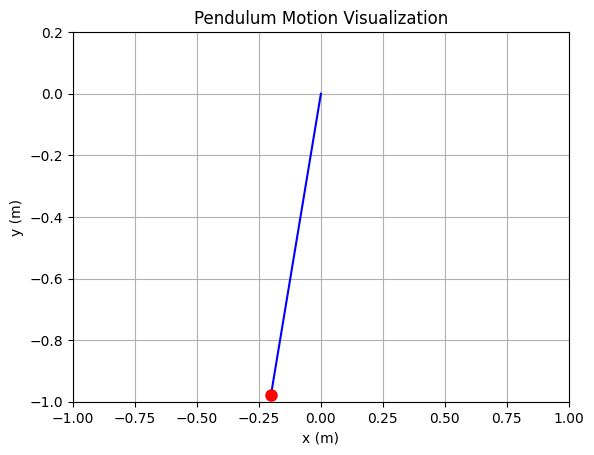

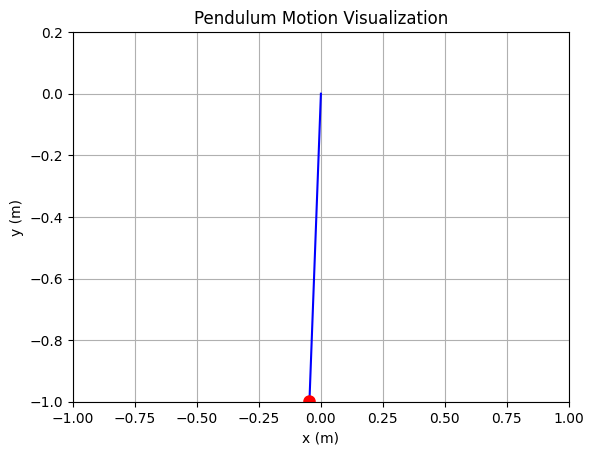

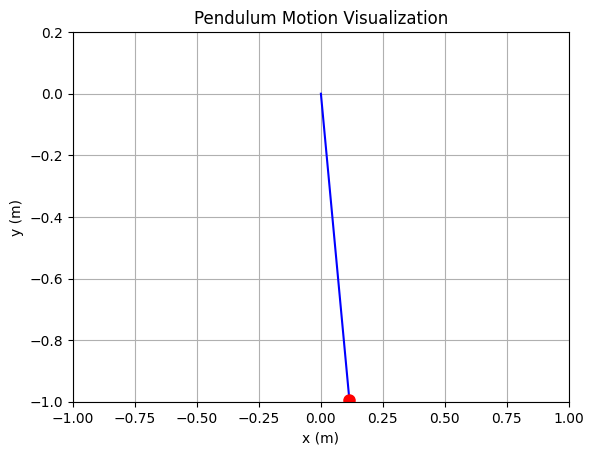

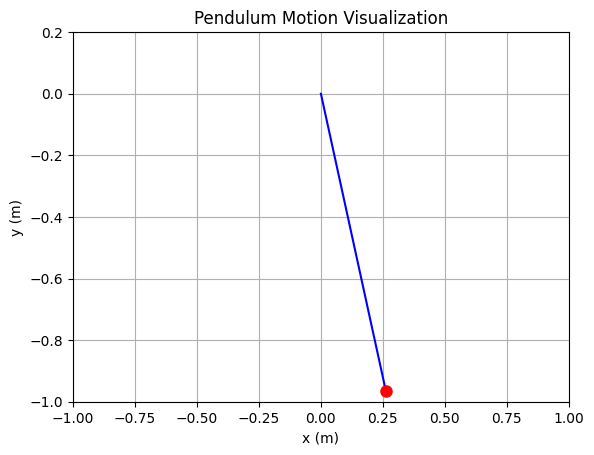

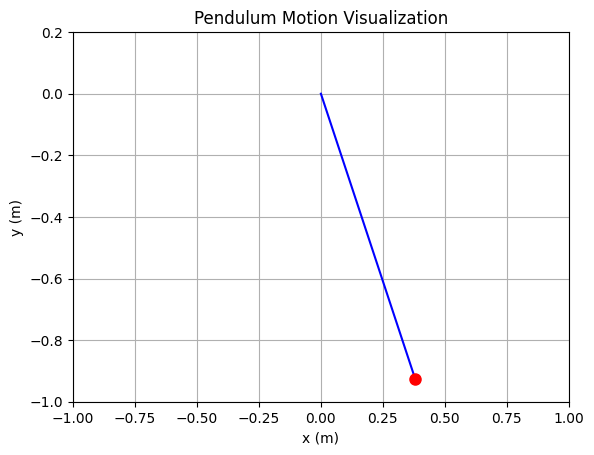

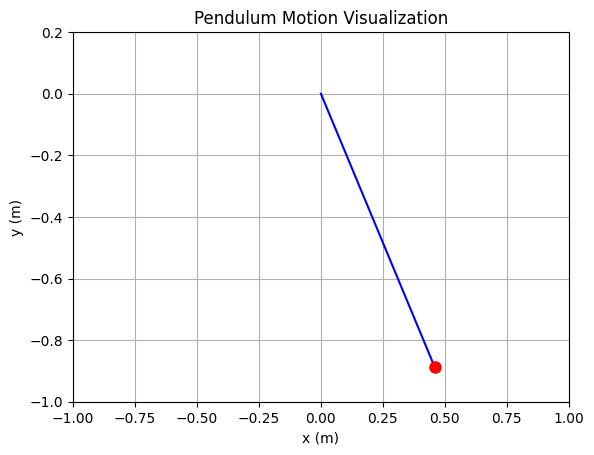

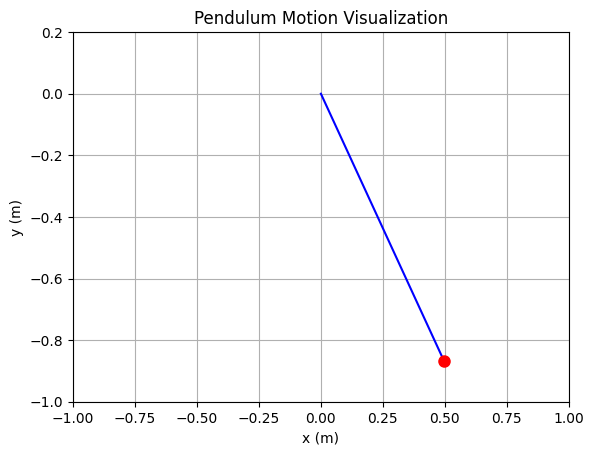

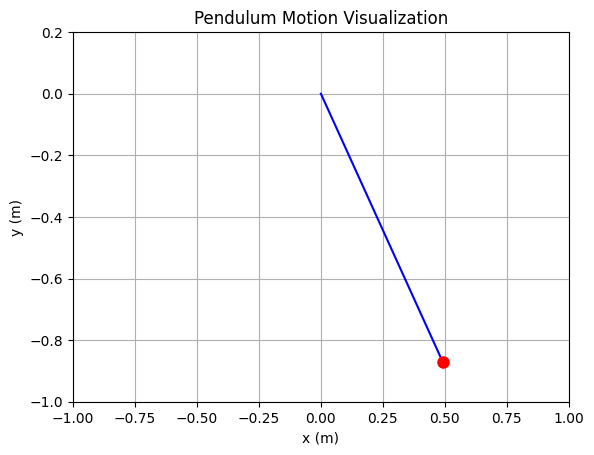

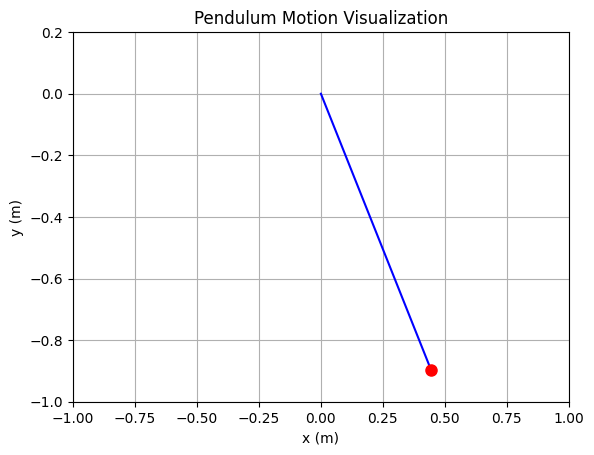

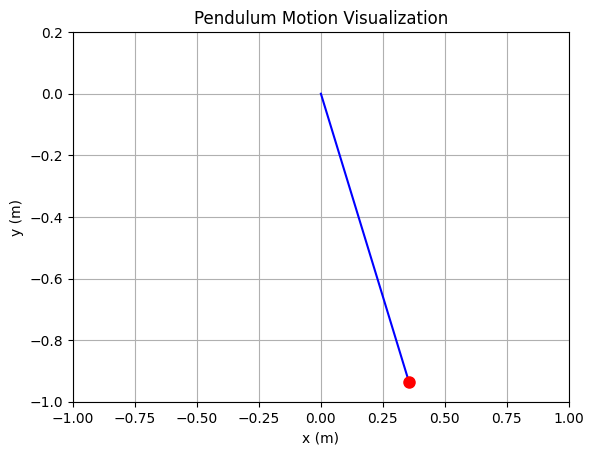

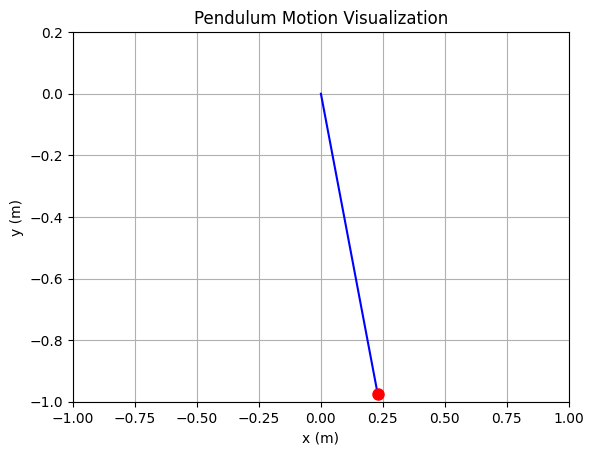

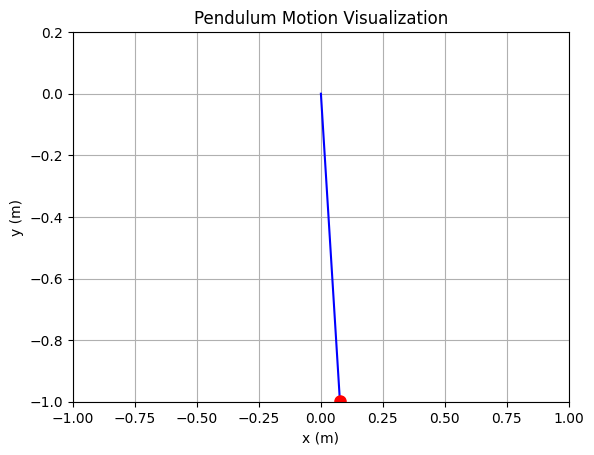

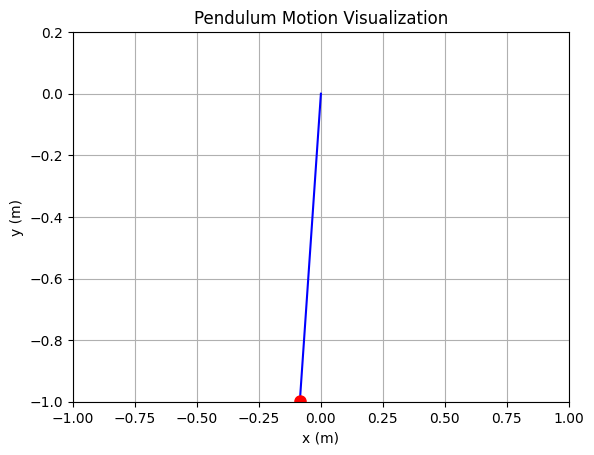

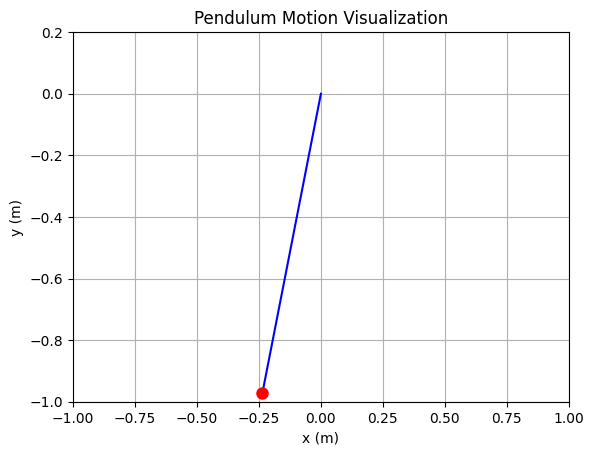

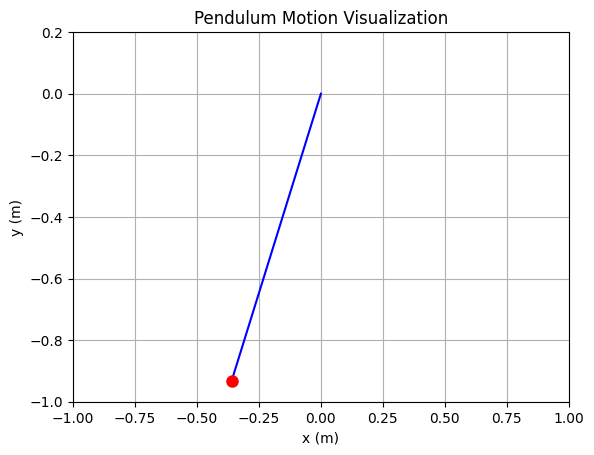

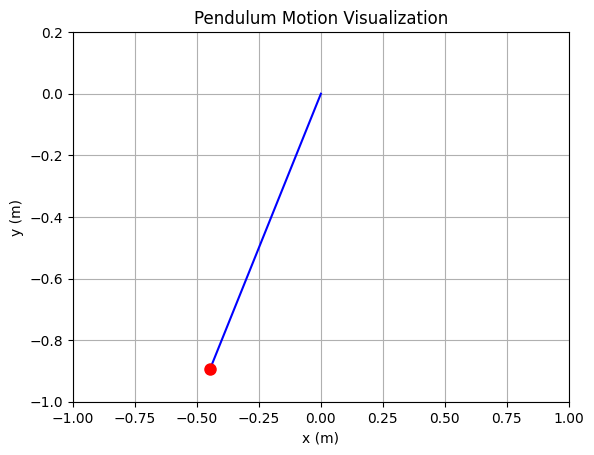

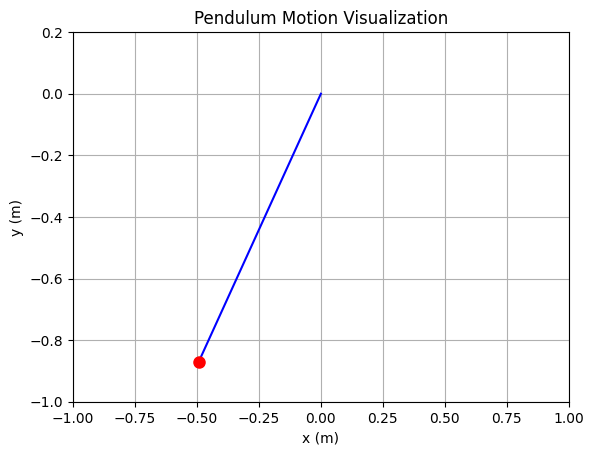

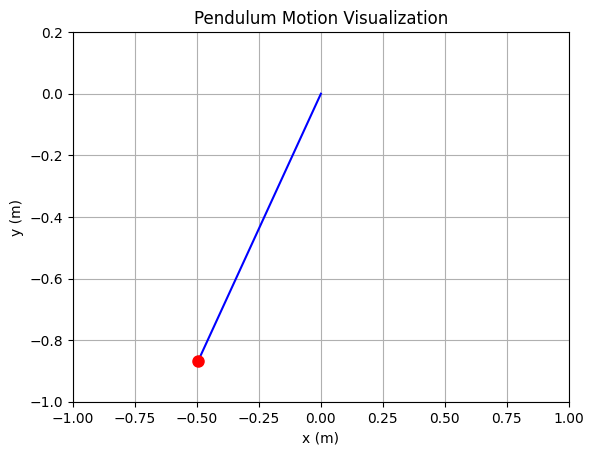

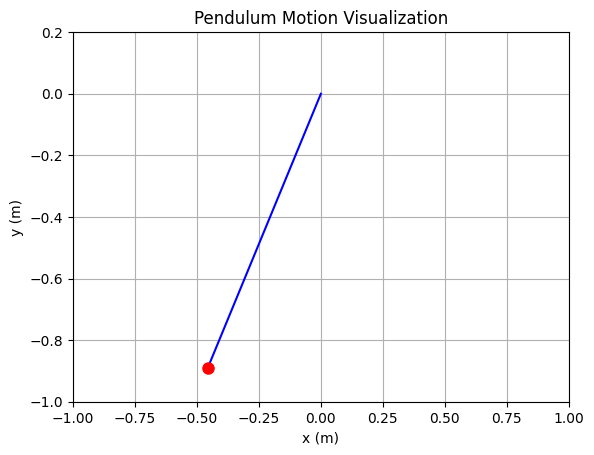

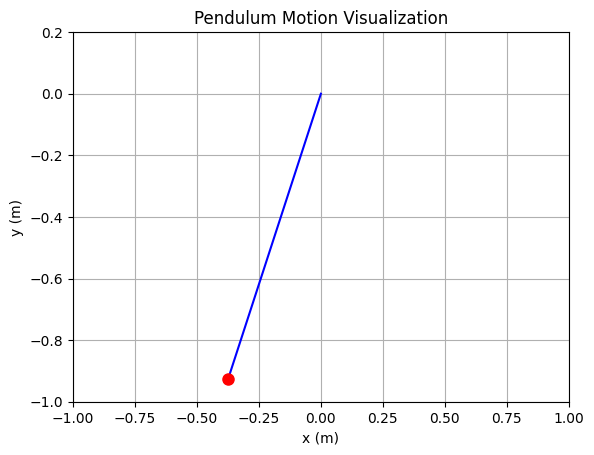

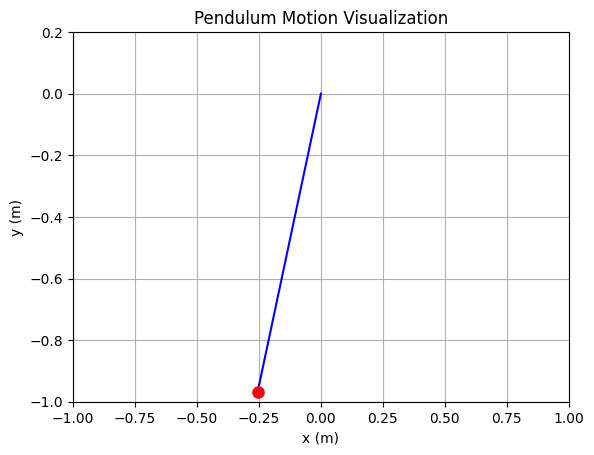

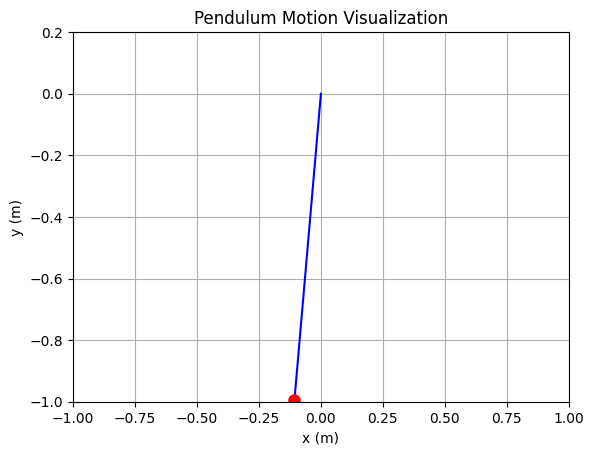

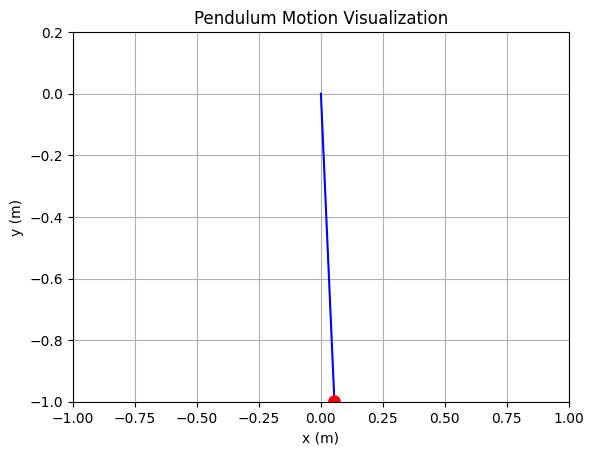

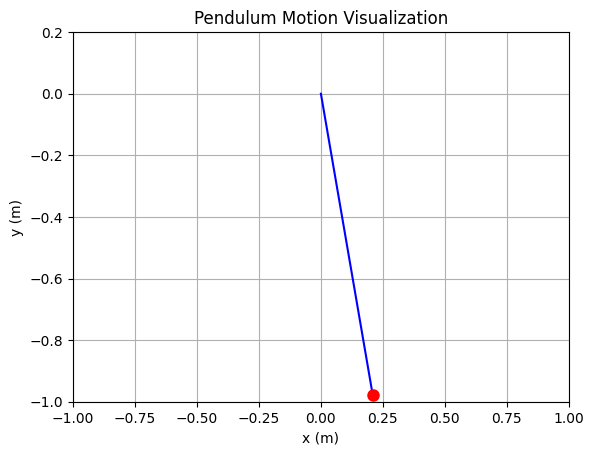

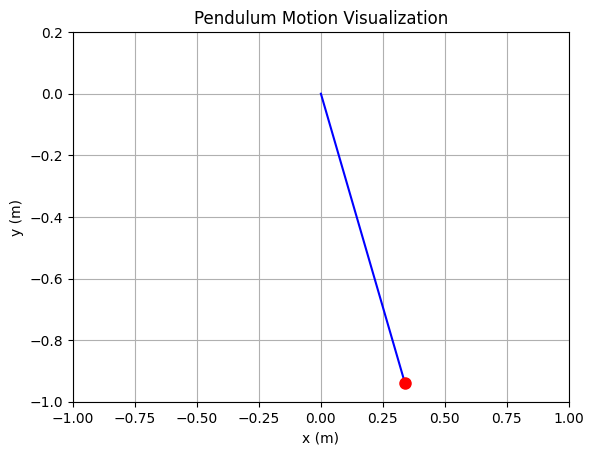

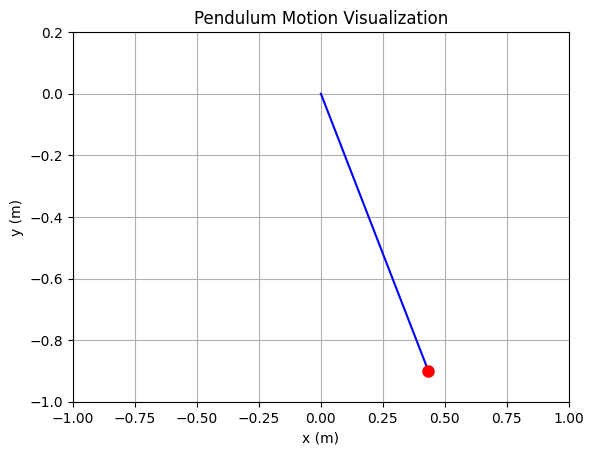

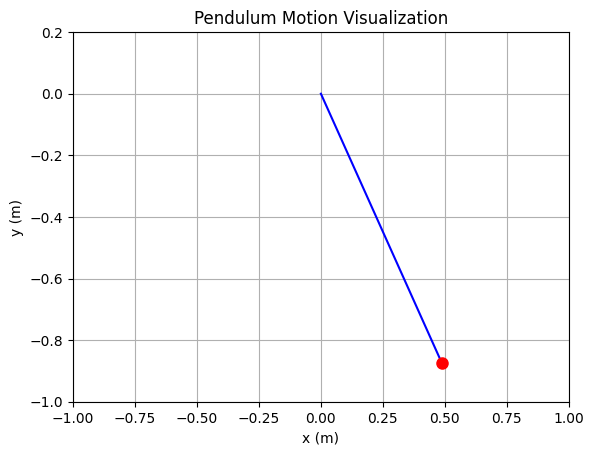

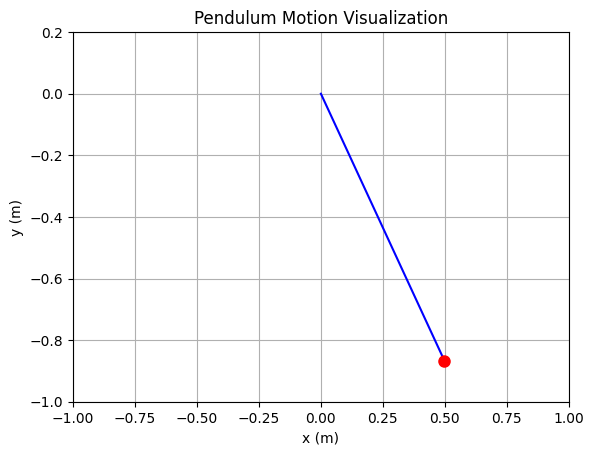

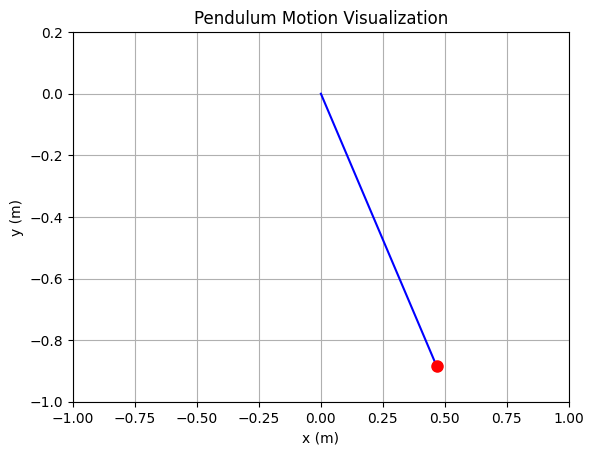

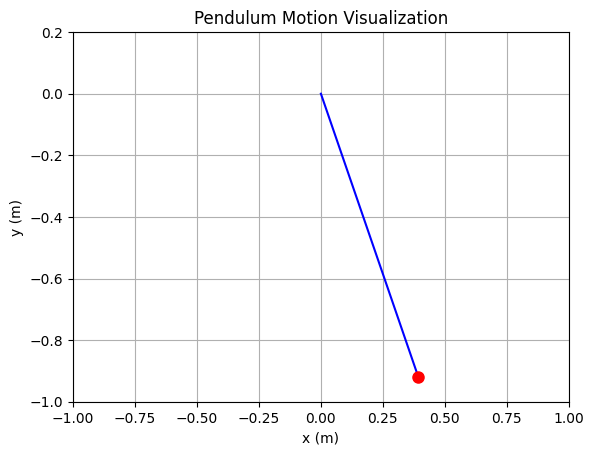

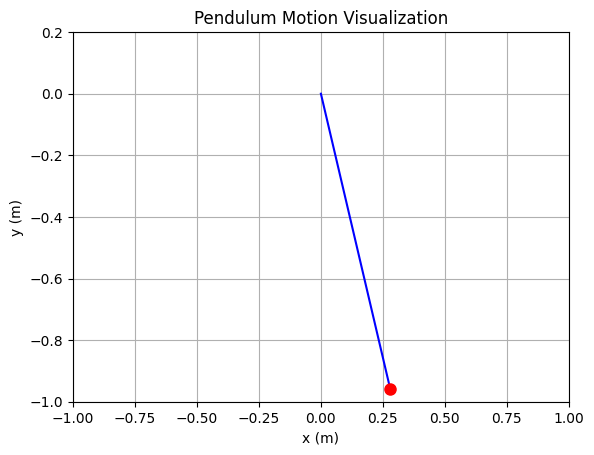

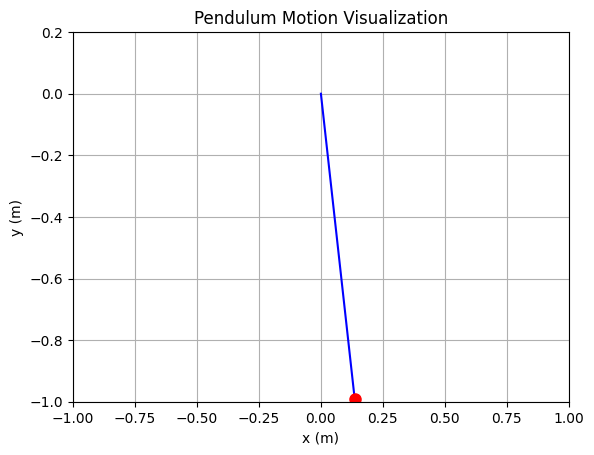

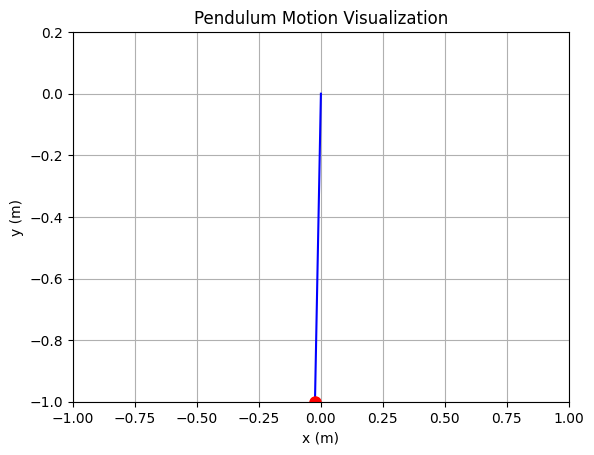

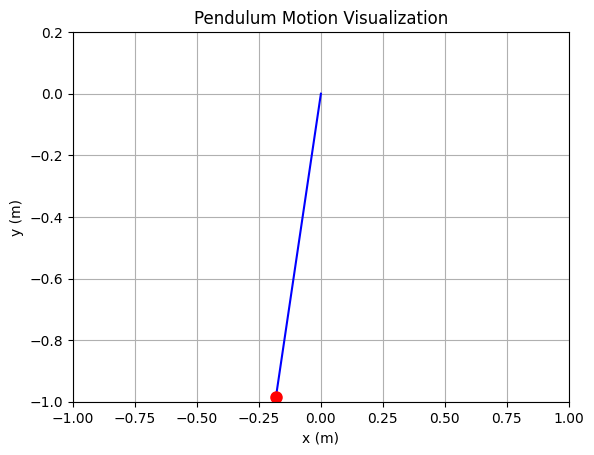

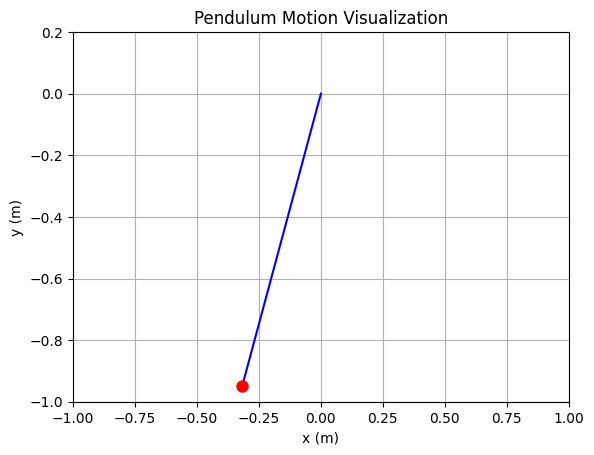

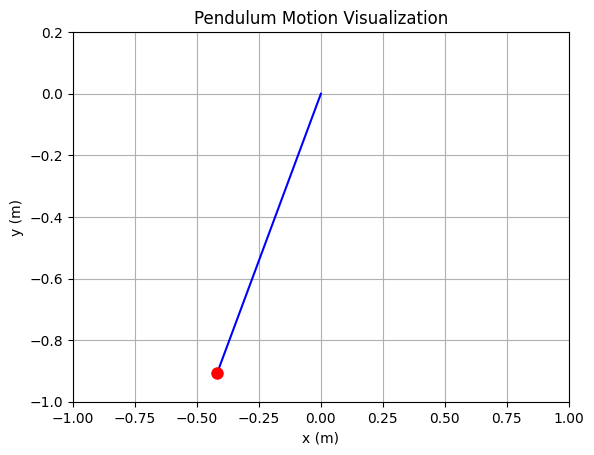

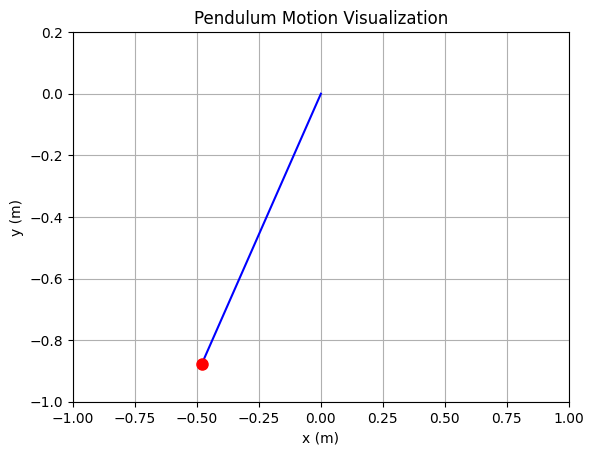

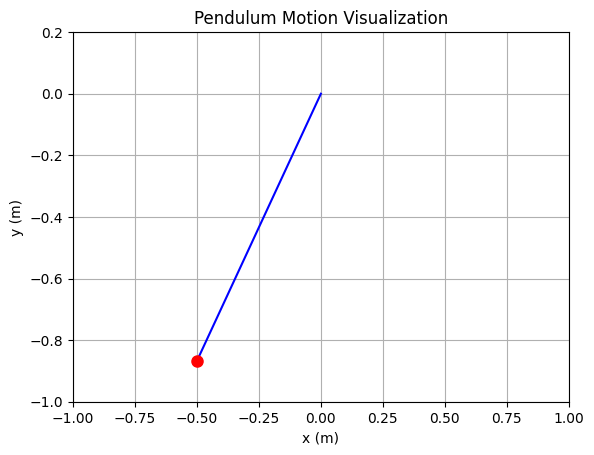

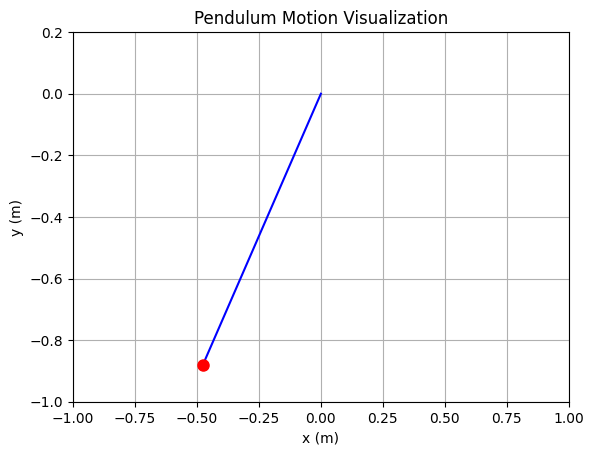

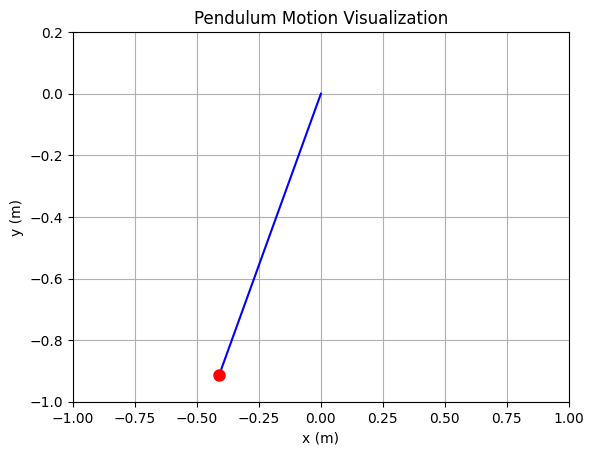

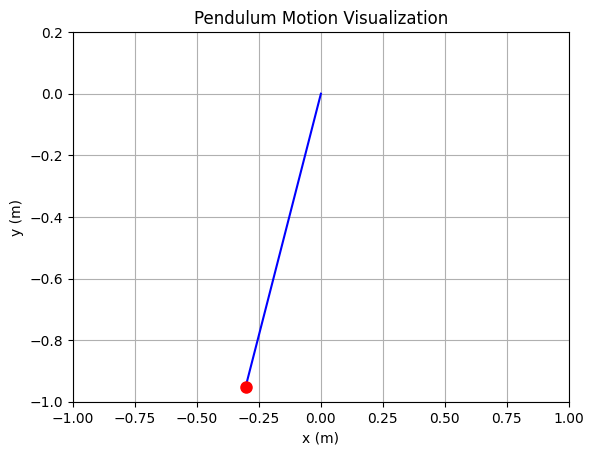

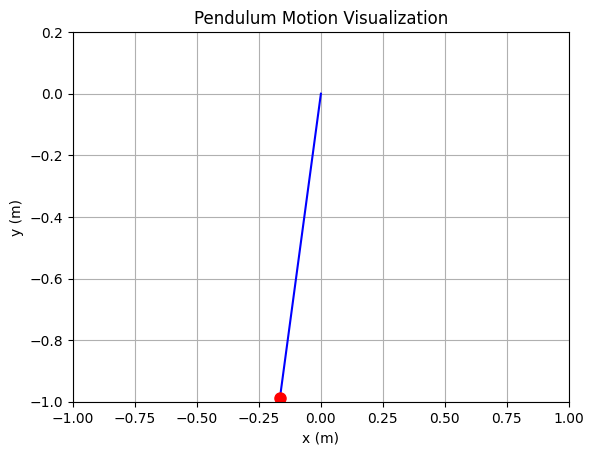

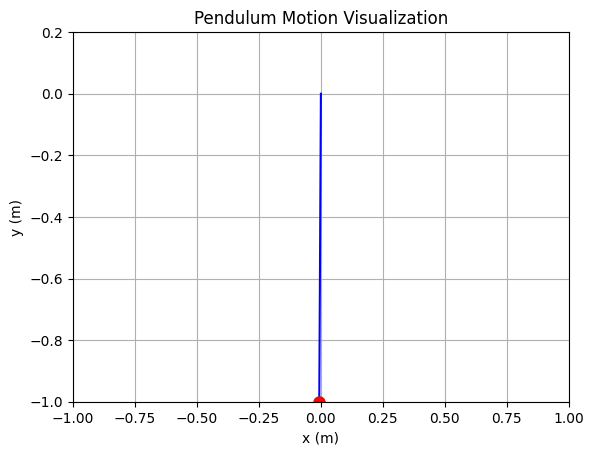

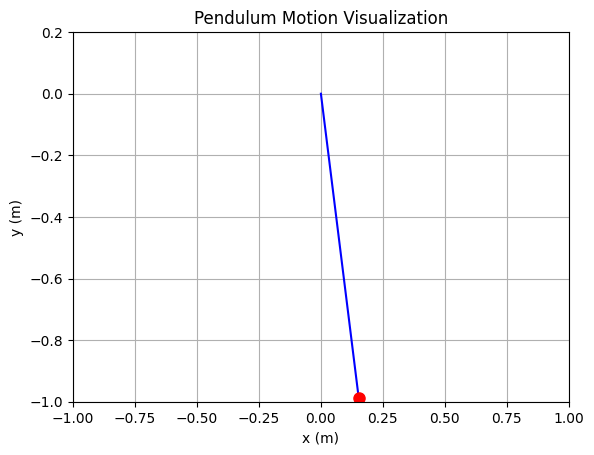

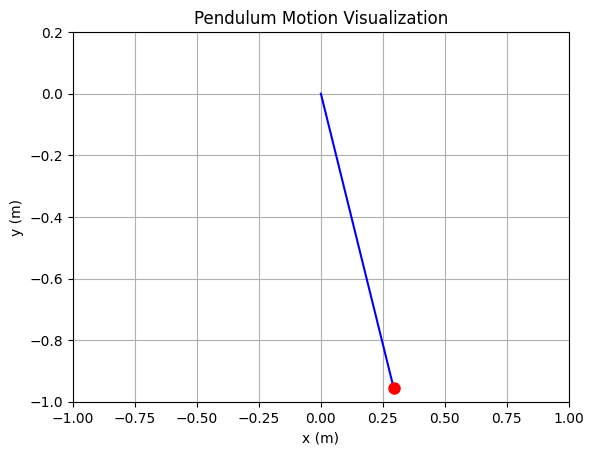

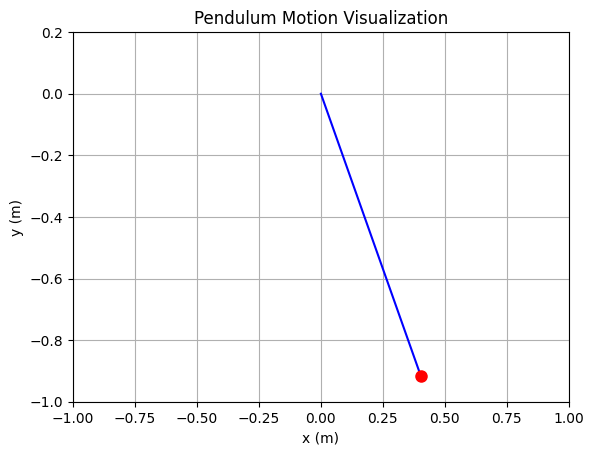

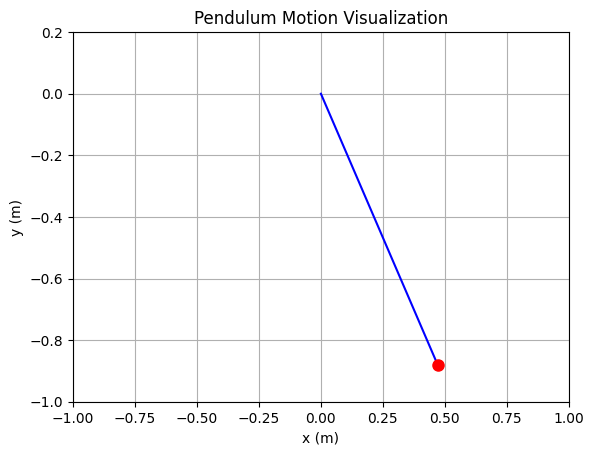

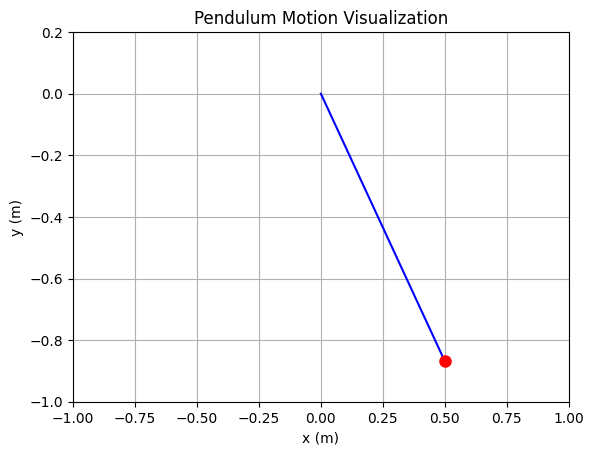

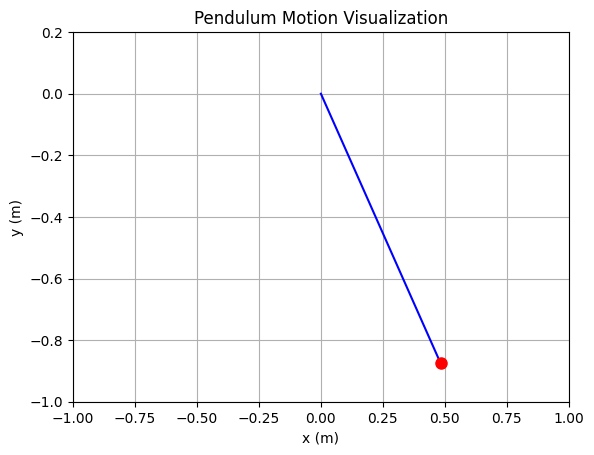

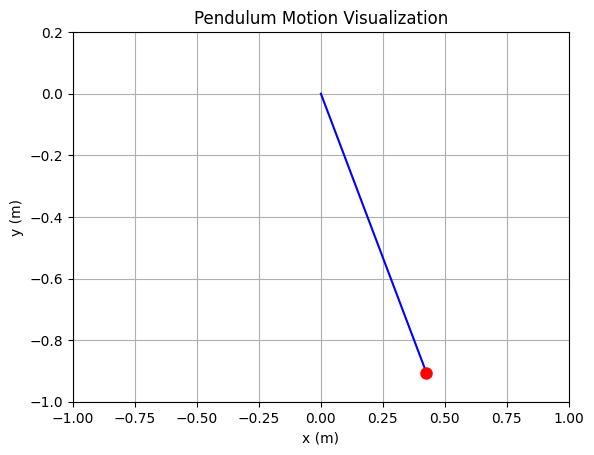

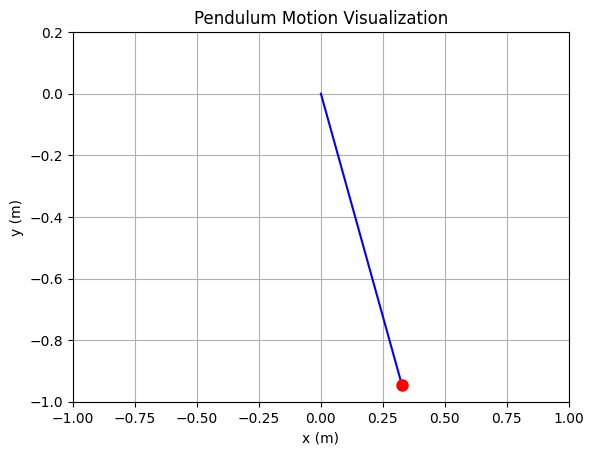

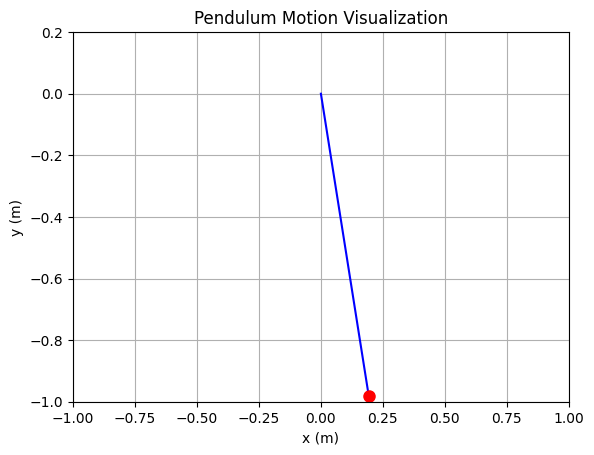

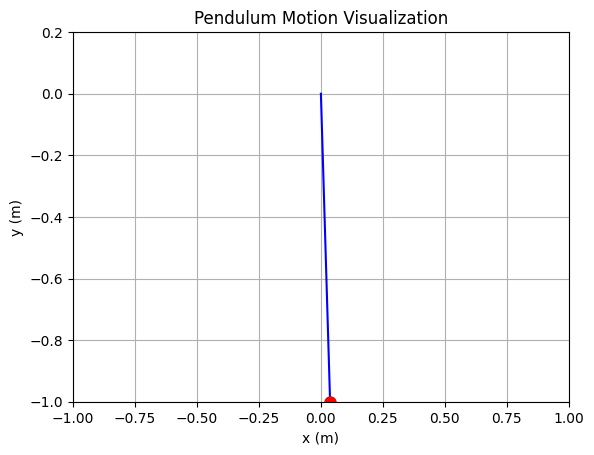

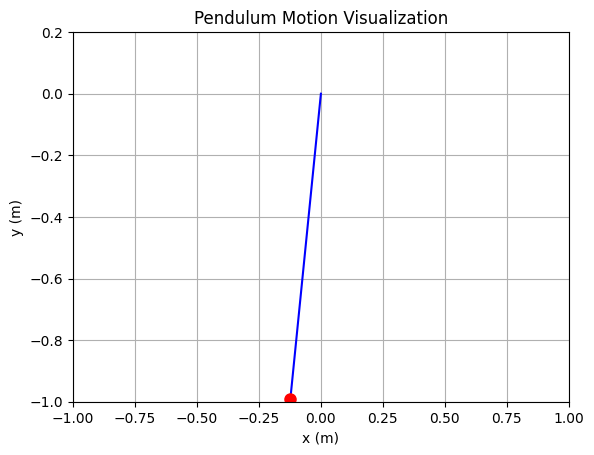

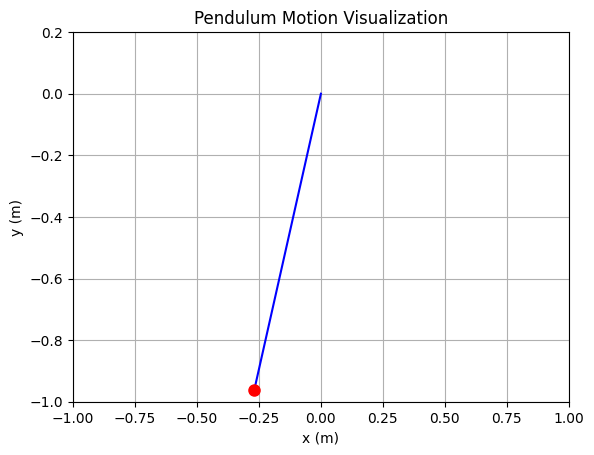

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

#get the constants required for the visualistion of damped and motion pendulum
g = 9.81  # gravitational acceleration in m/s^2
L = 1.0   # length of the pendulum in meters
m = 1.0   # mass of the pendulum bob in kg

# Initial conditions (we set the initla startin angle to 30 degrees buit they are AND MUST BE measured in radianms)
theta_0 = np.radians(30)  # Initial angle (30 degrees)
omega_0 = 0.0  # Initial angular velocity

# Time span for the simulation (measuring the first 10 second trime stamp with 1000 interval to get a very bery HIGH accutracy)
t_span = (0, 10)  # from 0 to 10 seconds
t_eval = np.linspace(0, 10, 1000)  # 1000 time points for evaluation

# Equations of motion: [dtheta/dt, domega/dt]
def pendulum_eqns(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Solve the differential equation using solve_ivp
sol = solve_ivp(pendulum_eqns, t_span, [theta_0, omega_0], t_eval=t_eval)

# Extract the solution for theta and omega
theta_sol = sol.y[0]
omega_sol = sol.y[1]

# Create a pandas DataFrame to hold the data
data = {
    'Time (s)': sol.t,
    'Angle (radians)': theta_sol,
    'Angle (degrees)': np.degrees(theta_sol),
    'Angular Velocity (rad/s)': omega_sol
}
df = pd.DataFrame(data)

# Print the DataFrame
print(df.head())  # Display the first few rows of the DataFrame

# Use SymPy for symbolic integration
t = sp.symbols('t')
theta_sym = sp.Function('theta')(t)
omega_sym = sp.Function('omega')(t)

# Define the equations of motion
dtheta_dt_sym = omega_sym
domega_dt_sym = -(g / L) * sp.sin(theta_sym)

# Display the symbolic equations
print("Symbolic Equations:")
sp.pprint(dtheta_dt_sym)
sp.pprint(domega_dt_sym)

# Plotting the pendulum motion over time (angle vs. time)
plt.figure(figsize=(10, 6))
plt.plot(sol.t, np.degrees(theta_sol), label="Angle (degrees)")
plt.plot(sol.t, omega_sol, label="Angular Velocity (rad/s)")
plt.title('Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle / Angular Velocity')
plt.legend()
plt.grid()
plt.show()

# Visualization of the pendulum's trajectory
plt.figure(figsize=(6, 6))
for i in range(0, len(theta_sol), 10):  # Visualize every 10th point
    x = L * np.sin(theta_sol[i])  # x = L*sin(theta)
    y = -L * np.cos(theta_sol[i]) # y = -L*cos(theta)
    plt.plot([0, x], [0, y], color='blue')  # Pendulum arm
    plt.plot(x, y, 'ro', markersize=8)      # Pendulum bob
    plt.xlim([-L, L])
    plt.ylim([-L, 0.2])
    plt.title('Pendulum Motion Visualization')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.grid(True)
    plt.pause(0.01)

plt.show()

# Extract the solution for theta and omega
theta_sol = sol.y[0]
omega_sol = sol.y[1]

# Convert angular displacement to x, y coordinates for plotting
x = L * np.sin(theta_sol)  # x = L*sin(theta)
y = -L * np.cos(theta_sol) # y = -L*cos(theta)

# Plotting the pendulum motion over time (angle vs. time)
plt.figure(figsize=(10, 6))
plt.plot(sol.t, np.degrees(theta_sol), label="Angle (degrees)")
plt.plot(sol.t, omega_sol, label="Angular Velocity (rad/s)")
plt.title('Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Angle / Angular Velocity')
plt.legend()
plt.grid()
plt.show()

# Visualization of the pendulum's trajectory
plt.figure(figsize=(6, 6))
for i in range(0, len(x), 10):  # Visualize every 10th point
    plt.plot([0, x[i]], [0, y[i]], color='blue')  # Pendulum arm
    plt.plot(x[i], y[i], 'ro', markersize=8)      # Pendulum bob
    plt.xlim([-L, L])
    plt.ylim([-L, 0.2])
    plt.title('Pendulum Motion Visualization')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.grid(True)
    plt.pause(0.01)

plt.show()


In [3]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-02 ...  9.990e+00  1.000e+01]
        y: [[ 5.236e-01  5.234e-01 ...  4.182e-01  4.276e-01]
            [ 0.000e+00 -4.909e-02 ...  9.591e-01  9.188e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 212
     njev: 0
      nlu: 0